In [1]:
import pandas as pd
import sys
import os
sys.path.append("..")

data = pd.read_csv("../data/META_historical_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2926 non-null   object 
 1   Open          2926 non-null   float64
 2   High          2926 non-null   float64
 3   Low           2926 non-null   float64
 4   Close         2926 non-null   float64
 5   Adj Close     2926 non-null   float64
 6   Volume        2926 non-null   int64  
 7   Dividends     2926 non-null   float64
 8   Stock Splits  2926 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.9+ KB


In [2]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [3]:
# Function to handle missing values
def handle_missing_values(data):
    data = data.ffill()  
    return data

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0


In [4]:
def analyze_statistics(data, columns):
    print(f"Statistics for AMZN:")
    print(data[columns].describe())

analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

Statistics for AMZN:
              Open         High          Low    Adj Close        Close  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean    179.557215   181.875331   177.317761   179.305921   179.649453   
std     108.864895   110.256219   107.511134   108.755055   108.906971   
min      22.990000    23.090000    22.670000    22.853037    22.900000   
25%      97.767502    98.772499    95.889997    97.182795    97.382498   
50%     166.870003   168.850006   164.210007   166.512825   166.855003   
75%     231.450005   234.934998   228.687504   231.948360   232.424999   
max     542.349976   542.809998   528.359985   539.909973   539.909973   

             Volume  
count  2.926000e+03  
mean   2.872083e+07  
std    2.269811e+07  
min    5.467500e+06  
25%    1.571308e+07  
50%    2.176100e+07  
75%    3.294468e+07  
max    3.654579e+08  


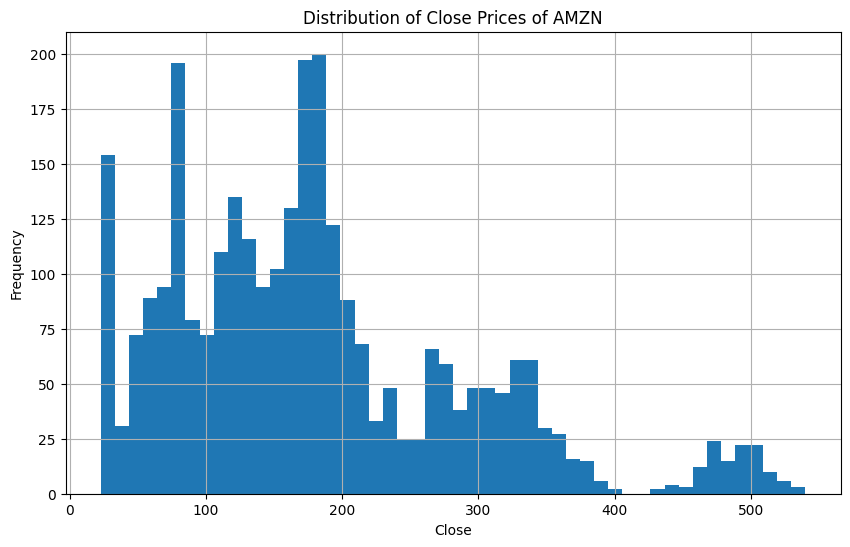

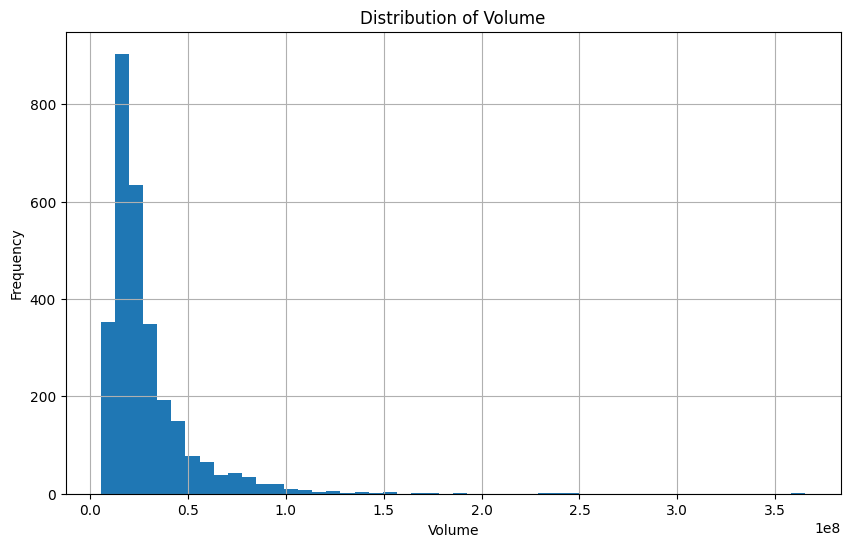

In [5]:
import matplotlib.pyplot as plt

def plot_distributions(data, column, bins=50, title="Distribution"):
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=bins)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

plot_distributions(data, 'Close', title="Distribution of Close Prices of AMZN")
plot_distributions(data, 'Volume', title="Distribution of Volume")


Correlation Matrix for AMZN:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999774  0.999747   0.999492  0.999491 -0.391211
High       0.999774  1.000000  0.999713   0.999768  0.999768 -0.387068
Low        0.999747  0.999713  1.000000   0.999778  0.999779 -0.395943
Adj Close  0.999492  0.999768  0.999778   1.000000  0.999999 -0.391539
Close      0.999491  0.999768  0.999779   0.999999  1.000000 -0.391652
Volume    -0.391211 -0.387068 -0.395943  -0.391539 -0.391652  1.000000


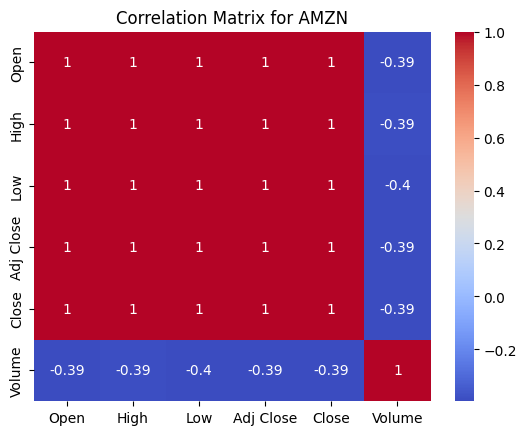

In [6]:
import seaborn as sns

def analyze_correlations(data, columns):
    correlation_matrix = data[columns].corr()
    print(f"\nCorrelation Matrix for AMZN:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix for AMZN")
    plt.show()
    
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

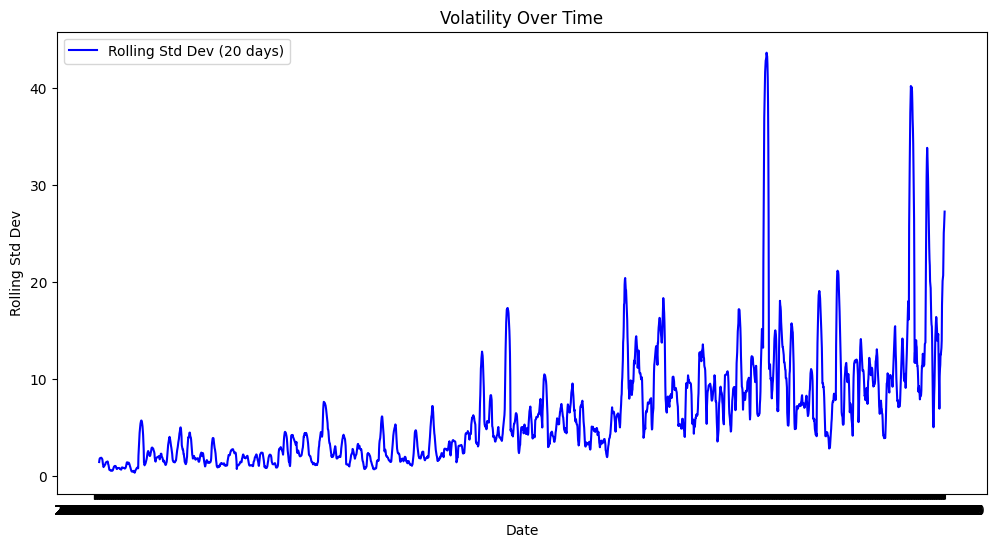

In [7]:
# Function to study volatility
def plot_volatility(data, value_col, date_col, window=20):
    data['Rolling_Std'] = data[value_col].rolling(window=window).std()
    plt.figure(figsize=(12, 6))
    plt.plot(data[date_col], data['Rolling_Std'], label=f"Rolling Std Dev ({window} days)", color='blue')
    plt.title("Volatility Over Time")
    plt.xlabel("Date")
    plt.ylabel("Rolling Std Dev")
    plt.legend()
    plt.show()

plot_volatility(data, 'Close', 'Date')

In [8]:
import pandas as pd
import talib as ta

import sys
import os
from IPython.display import display

# Load the stock data loader script
sys.path.append(os.path.abspath('./scripts'))
from scripts.load_stock_data import load_stock_data

# List of company names
company_names = ['AMZN']

# Dictionary to store stock data
stock_data = {}

# Load data for company
for company in company_names:
    stock_data[company] = load_stock_data(f'../data/{company}_historical_data.csv')

# Define your apply_technical_indicators function
def apply_technical_indicators(df):
    # Calculate Simple Moving Average (SMA)
    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
    
    # Calculate Relative Strength Index (RSI)
    df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'], 
                                                              fastperiod=12, 
                                                              slowperiod=26, 
                                                              signalperiod=9)
    return df

# Apply technical indicators to company's data
for company, data in stock_data.items():
    stock_data[company] = apply_technical_indicators(data)

# Display the first few rows of the data for company
for company, data in stock_data.items():
    print(f"--- {company} ---")
    display(data.head())

--- AMZN ---


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN


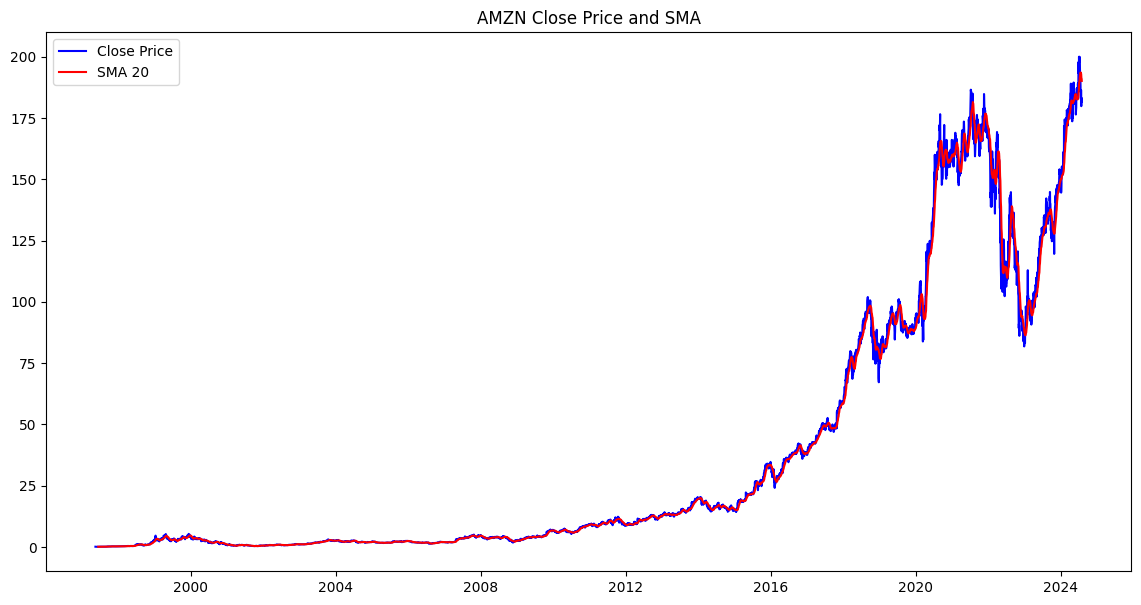

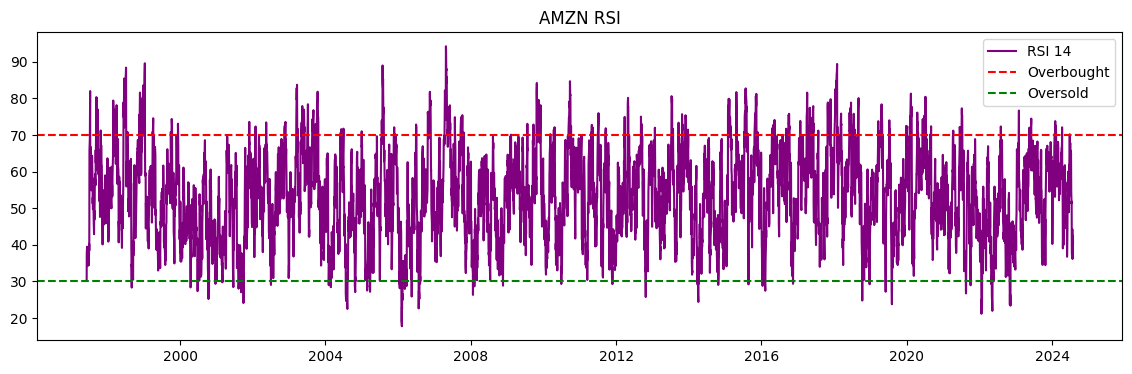

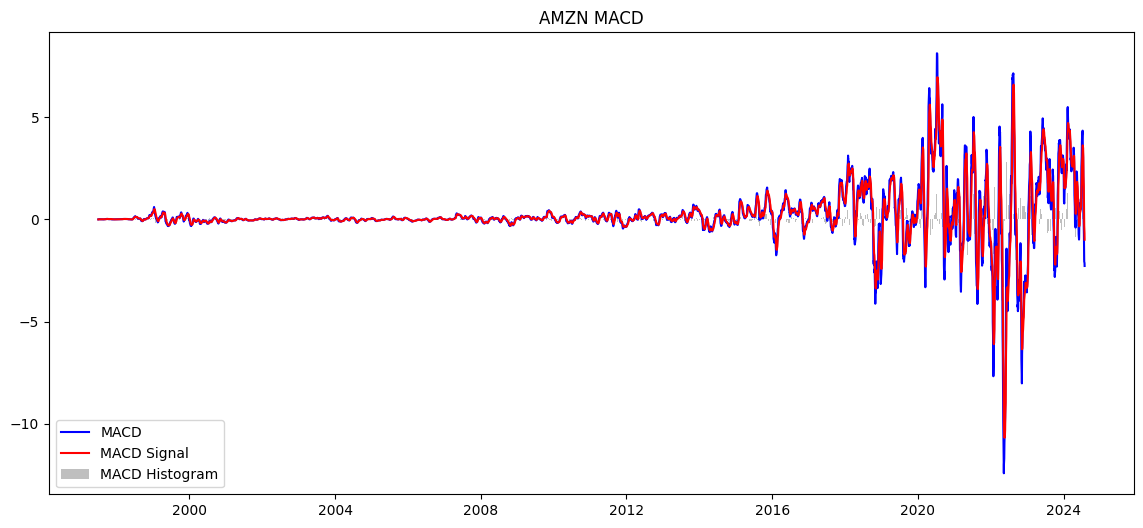

In [9]:
import matplotlib.pyplot as plt

# Choose a company to plot (e.g., 'AAPL')
company_to_plot = 'AMZN'
data = stock_data[company_to_plot]

# Plot Close Price and SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='SMA 20', color='red')
plt.title(f'{company_to_plot} Close Price and SMA')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(data['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title(f'{company_to_plot} RSI')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 6))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='MACD Signal', color='red')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title(f'{company_to_plot} MACD')
plt.legend()
plt.show()

In [10]:
data['Daily_Return'] = data['Adj Close'].pct_change()
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

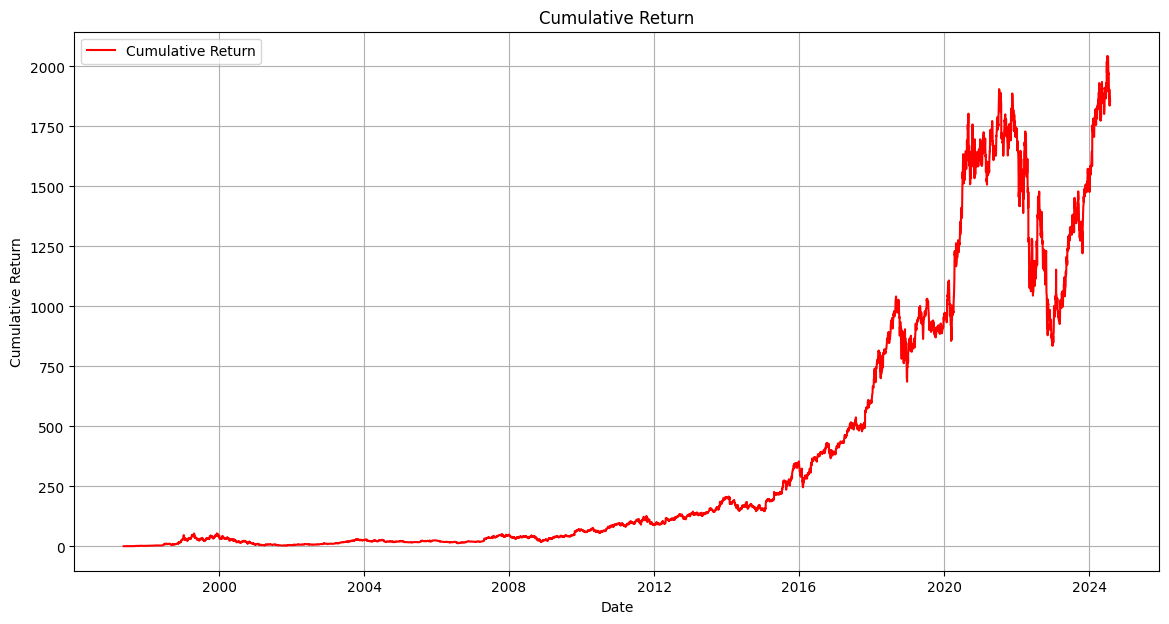

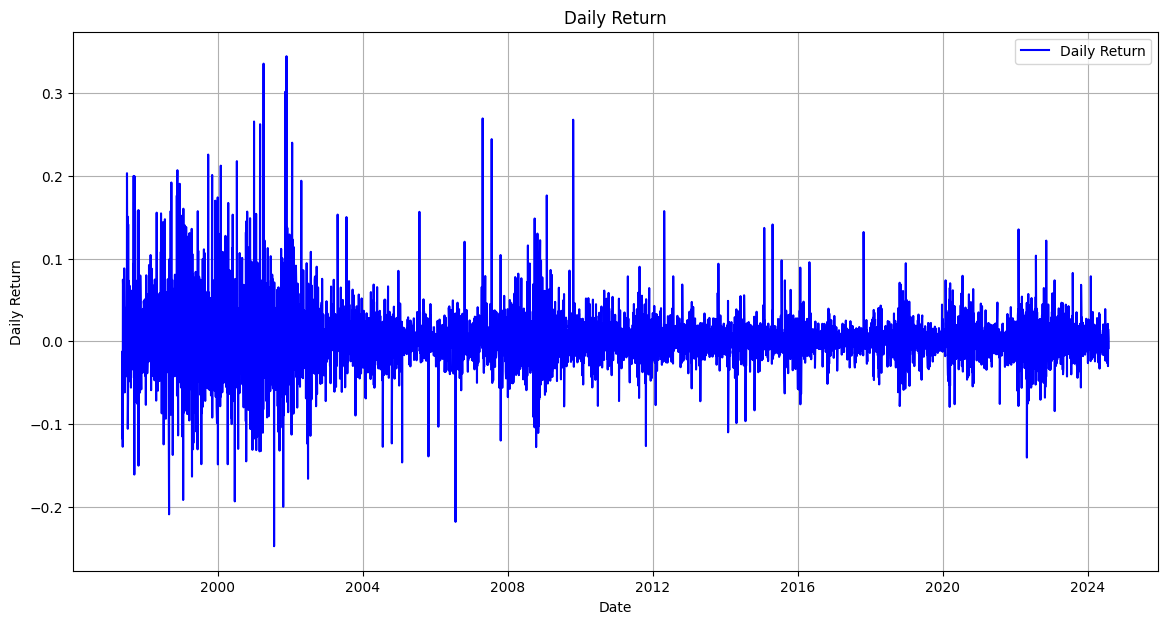

In [11]:
# Ensure 'Date' is a column and properly formatted
data.reset_index(inplace=True)  # Converts index to a column if 'Date' is in the index
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])  # Ensure it's in datetime format

# Define the plotting function
def plot_financial_metrics(data):
    """Plot daily returns and cumulative returns."""
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Cumulative_Return'], label='Cumulative Return', color='red')
    plt.title('Cumulative Return')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Daily_Return'], label='Daily Return', color='blue')
    plt.title('Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function
plot_financial_metrics(data)